
# **Приоритизация гипотез**

**Введение** 

В крупном интернет-магазинае отдел маркетинга подготовил список гипотез для увеличения выручки, необходимо провести приоритизацию гипотез, запустить A/B-тест и проанализировать результаты. Для этого нужно сдеать следующее

- Применить фреймворк ICE и RICE для приоритизации гипотез
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE
- Проанализировать A/B-тест по кумулятивным показателям
- Построить необхоимые графики
- Посчитать статистическую значимость по различным покателям
- Примить решеня по результатам теста и сделать выводы


## ЧАСТЬ

### просмотр данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import scipy.stats as stats
import datetime as dt #импортируем библиотеки
pd.set_option('display.max_colwidth', False)


In [2]:
data = pd.read_csv('/datasets/hypothesis.csv') #читаем данные

In [3]:
data #смотрим данные

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
data.info() #смотрим информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
data.isna().sum()# смортим есть ли пропущенные значения

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [6]:
for i in data: # Приведем все к нижнему регистру и змеиному
    
    data = data.rename(columns={i : i.lower()})

In [7]:
data['hypothesis'].unique() # Смотрим гипотезы

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

<div style="border:solid blue 2px; padding: 20px">
    Вывод: в подборке данных не выявлено проблем, для удобства изменен регистр

### фреймворк ICE для м гипотез

**ICE (влияние, уверенность, усилия)**


**фрмула - ICE score = (Impact x Confidence) / Efforts**

**Насколько идея положительно повлияет на ключевой показатель, который нужно улучшить**

In [8]:
data['ICE'] =  (round((data['impact'] * data['confidence']) /data['efforts'],2))

display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<div style="border:solid blue 2px; padding: 20px">
    Вывод: лидер рейтинга гиротеза с номером 8 запустить акцию на скидку, следом идут 0 и 7

### фреймворк RICE для приоритизации гипотез

**Охват - измеряется количеством людей/событий за период времени**

In [9]:
data['RICE'] =  ((data['reach']*data['impact'] * data['confidence']) /data['efforts'])

display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div style="border:solid blue 2px; padding: 20px">
    Вывод: лидер рейтинга охвата гиротезы с номероми 7, 2 , 0

### изменение приоритизаций гипотез при применении RICE вместо ICE

<div style="border:solid blue 2px; padding: 20px">
    Вывод: в таблица меняются позиции  в ICE лидеры - это гипотезы 8, 0, 7 , а в RICE - 7(была на 3 мете), 2(была на 5), 0(на 2); а лидер таблицы ICE - 8 сместился  на пятыю позицыию, изменение связано с тем, что в RICE учтено сколько пользователей затронет изменение, которое мы хотим внести. Проверить стоит гипотезу 7 которая остается в топе в обеих таблицах.

## ЧАСТЬ


### просмотр данных

In [10]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [12]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [13]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [14]:
orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
visitors.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [17]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [18]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [19]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [20]:
display(orders.duplicated().sum())

0

In [21]:
display(visitors.duplicated().sum())

0

In [22]:
display(data.duplicated().sum())

0

In [23]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [24]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

In [25]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [26]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [27]:
orders['group'].unique() 

array(['B', 'A'], dtype=object)

In [28]:
orders['transactionId'].equals(orders['visitorId'])

False

<div style="border:solid blue 2px; padding: 20px">
    Вывод: в подборке данных не выявлено проблем, для удобства изменен тип даты
сколько у нас групп в АВ-тесте? -  2 А и В
даты начала и окончания теста? - д ата начала 2019-08-01 дата конца 2019-08-31;
не попадают ли какие-то пользователи в обе группы? Мы имеем 58 пользователей, которые попали в обе группы, ниже добавил код.
Одни и те же пользователи попали в две группы теста — это говорит об ошибке в сборе данных. Удаление этих пользователей повлияет на конверсию, поскольку мы можем удалить этих пользователей из таблицы с заказами, но не сможем удалить из таблицы с визитами, поскольку там данные уже агрегированы за день.

**Анализ A/B-теста**

### график кумулятивной выручки по группам

**По центральной предельной теореме значение кумулятивных метрик часто сходится и устанавливается около некоторого среднего. Тогда по графику кумулятивных метрик определяют, стоит ли принмать гипотезу или нет**

In [30]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [31]:
# получим агрегированные кумулятивные по дням данные
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [32]:
# агрегируем значения, вычислим максимальную дату, для группы тоже рассчитаем максимум
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [33]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [69]:
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


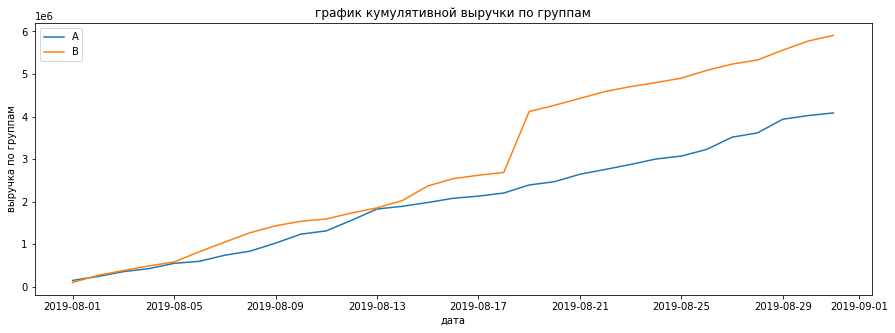

In [35]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('график кумулятивной выручки по группам')
plt.xlabel('дата')
plt.ylabel('выручка по группам')
plt.show();

<div style="border:solid blue 2px; padding: 20px">
    Вывод: выручка  равномерно увеличивается в начале теста и расходится с середины, график выручки групы В в одной точке резко растет. Это может сигнализировать о всплеске заказов, либо о появлении очень дорогих заказов в выборке в этот день, для интереса посмотрим этот момент.

In [36]:
cumulativeRevenueB.query(' "2019-08-17" <= date <= "2019-08-21" ') # Заказы в точке роста

,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437


In [37]:
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(8)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A


<div style="border:solid blue 2px; padding: 20px">
    Вывод: один заказ на 1294500 устроил подьем линии графика, счиатем его флуктуацией и принимаем

### график кумулятивного среднего чека по группам.

In [46]:
cumulativeRevenueA

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109
10,2019-08-06,598401,127
12,2019-08-07,740818,145
14,2019-08-08,837097,161
16,2019-08-09,1025603,177
18,2019-08-10,1236098,193


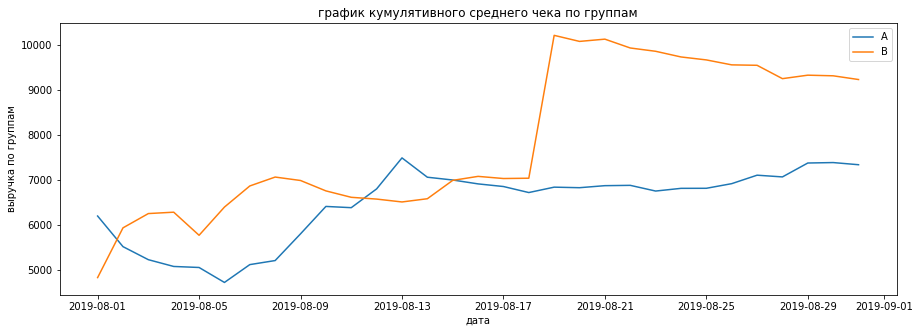

In [38]:
# построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('график кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('выручка по группам')
plt.show();

<div style="border:solid blue 2px; padding: 20px">
    Вывод: как и на прошлом графике средний чек тоже резко улетает в верех ближе к середине. В первой половине в группе "B" чек преимущественно больше, но есть даты где и наоборот - чек больше в "A", после рокового взлета группа В по немного показывает снижение а группа А небольшй рост

### график относительного изменения кумулятивного среднего чека группы B к группе A

In [43]:
mergedCumulativeRevenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      31 non-null     datetime64[ns]
 1   revenueA  31 non-null     int64         
 2   ordersA   31 non-null     int64         
 3   revenueB  31 non-null     int64         
 4   ordersB   31 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.5 KB


In [49]:
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


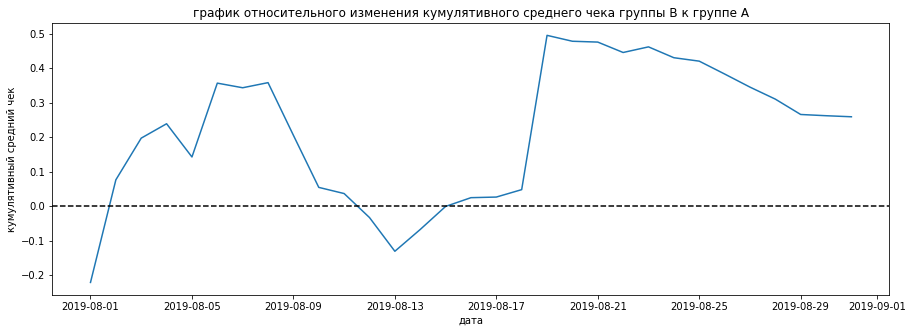

In [50]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.ylabel('кумулятивный средний чек')
plt.show();

<div style="border:solid blue 2px; padding: 20px">
    Вывод: график имеет такие же выводы как и в пункте выше, средний чек "B" рос в начале, снижался в середине и полетел вврех, после чего опять пошел на медленное снижение. Здесь хорошо видно, что был сильный рост почему это было мы уже выяснили. 


### график кумулятивного среднего количества заказов на посетителя по группам

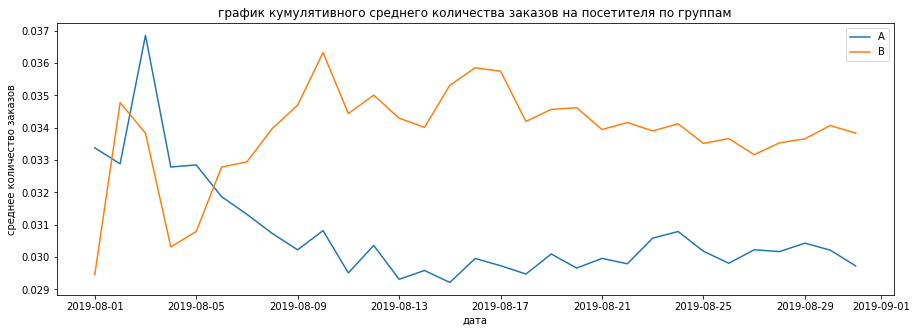

In [51]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15,5))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('график кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('дата')
plt.ylabel('среднее количество заказов')
plt.show();



<div style="border:solid blue 2px; padding: 20px">
    Вывод: группы колебались около одного значения, но затем конверсия группы A в начале месяца вырвалась вперёд и зафиксировалась в стагнации, а конверсия группы B просела и также зафиксировалась и  превысила конверсию "A". Конверися В росла до 10 августа чуть выше, затем пошло постепенное снижение. Можно сделать вывод - конверсия группы "B" в целом значительно больше "A" по всему графику



### график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [71]:
cumulativeDataA

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851
10,2019-08-06,A,127,114,598401,3985,0.031870
12,2019-08-07,A,145,131,740818,4629,0.031324
14,2019-08-08,A,161,146,837097,5239,0.030731
16,2019-08-09,A,177,159,1025603,5856,0.030225
18,2019-08-10,A,193,175,1236098,6262,0.030821


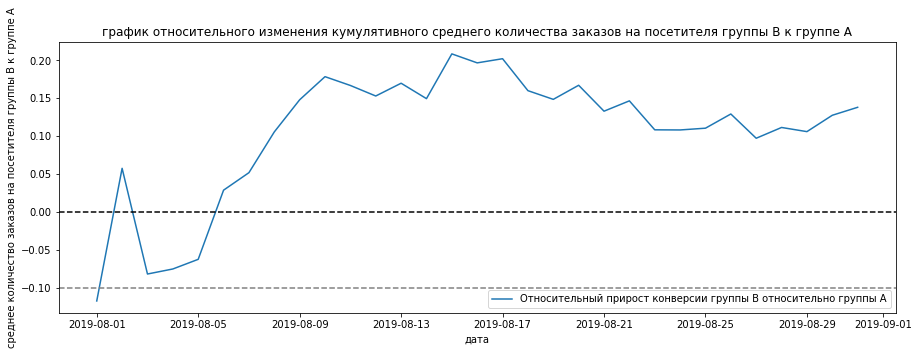

In [52]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('дата')
plt.ylabel('среднее количество заказов на посетителя группы B к группе A')
plt.show();
 

<div style="border:solid blue 2px; padding: 20px">
    Вывод: в начале изучаемого периода  конверсия в "A" была больше, начиная с 6 августа группа "B" вышла в лидеры до конца периода


### точечный график количества заказов по пользователям

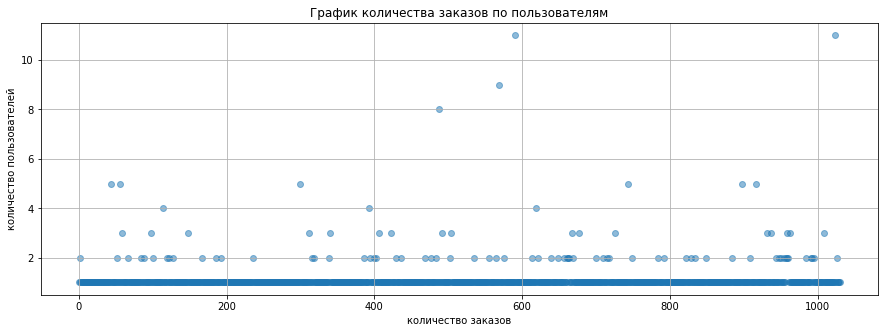

In [53]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.xlabel('количество заказов')
plt.ylabel('количество пользователей')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

<div style="border:solid blue 2px; padding: 20px">
    Вывод: 1 заказ сделало подовляющее количество пользователей, 2 заказа значительно меньшее чилсо пользователей, тех кто совершил 3 заказа совсем мало, выше 3 заказов - совсем совсем мало



### расчет 95-й и 99-й перцентили  количества заказов на пользователя

**В статистике N-й перцентиль — значение, которое случайная величина не превышает с заданной вероятностью. Так, для стандартного нормального распределения — нормального распределения со средним, равным 0, и стандартным отклонением, равным 1 — 95-й перцентиль имеет значение 1.645**

In [54]:
# 90, 95 и 99 перцентили среднего чека в выборке
display(np.percentile(ordersByUsers['orders'], [95, 99]))

array([2., 4.])

<div style="border:solid blue 2px; padding: 20px">
    Вывод: большинство пользователей делают 1 или 2 заказа

### точечный график стоимостей заказов

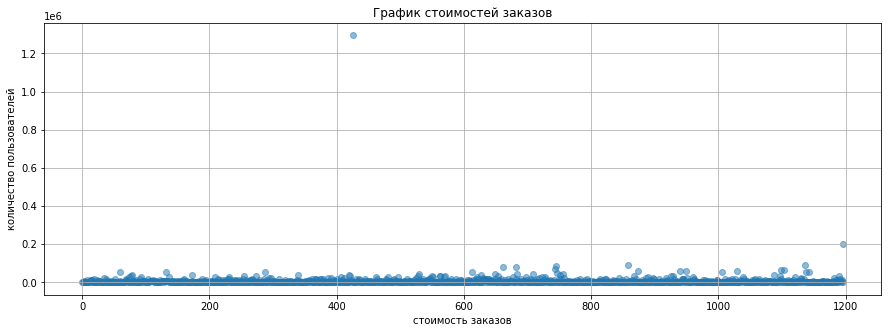

In [55]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('стоимость заказов')
plt.ylabel('количество пользователей')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

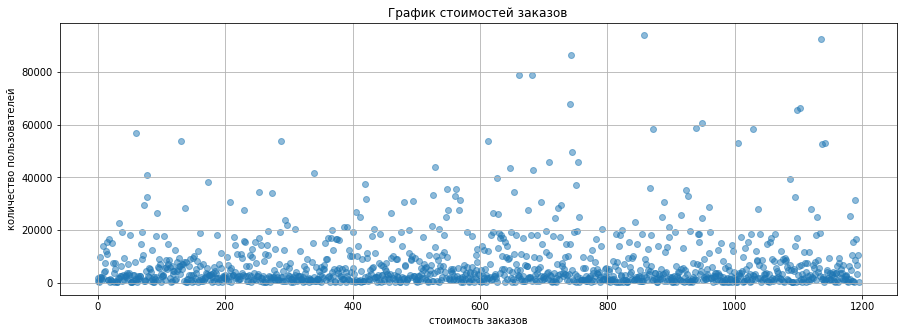

In [56]:
norm_orders = orders[orders['revenue']<=200000]['revenue'] #  уберем  выбросы с доходом большим 200000
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('стоимость заказов')
plt.ylabel('количество пользователей')
plt.scatter(xn_values, norm_orders, alpha=0.5);

<div style="border:solid blue 2px; padding: 20px">
    Вывод: большая часть заказов стоит в пределах 20 000

### расчет 95-й и 99-й перцентили стоимости заказов

In [57]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

<div style="border:solid blue 2px; padding: 20px">
    Вывод: 99% заказов меньше 58233.2

### статистическая значимость различий в среднем количестве заказов

In [58]:
visitors.head(1)

,date,group,visitors
0,2019-08-01,A,719


In [59]:
orders.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [60]:
orders.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [ ]:
orders = orders.rename(columns={'transactionId': 'orderId', 'visitorId': 'userId'})

In [ ]:
orders

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("alpha =",0.05)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Различие в средних= {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


<div class="alert alert-info"> <b></b> 
    
Нулевая гипотеза - "статистически значимых различий в конверсии между группами нет"
    
Альтернативная гипотеза - "статистически значимые различия есть"</div>

<div style="border:solid blue 2px; padding: 20px">
    Вывод: альфа 0.5 больше чем p-value которое равно 0.017 - нулевая гипотеза о том, что статистически значимых различий в конверсии между группами нет, - не принимается. Выигрыш группы "B" над "A" равен 13.8%


### статистическая значимость различий в среднем чеке заказа

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

<div style="border:solid blue 2px; padding: 20px">
    Вывод: P-value 0.729 больше альфы 0.05. Значит,нулевую гипотезу принимаем, средние чеки по "сырым" данным похожи, средний чек группы B выше среднего чека группы A на 0,259

### статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

<div style="border:solid blue 2px; padding: 20px">
    Вывод: p-value = 0.01 меньше альфы 0.05. Нулевуая гипотеза о статистически значимых различий в конверсии между группами - не верна ее не примаем. По «очищенным» данным различия в конверсии групп A и B присутствуют. Относительный выигрыш группы "B" выше "A" и  равен 0.174


### статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

<div style="border:solid blue 2px; padding: 20px">
    Вывод: P-value больше альфы 0.05. Как и с сырыми данными гипотезу прнимаем. Средний чек группы B оказался ниже на 2 процента, а по сырым данны был  примерно 26, что связано с аномальым заказом обнаруженным выше

### решение по результатам теста и его объяснение

<div style="border:solid blue 2px; padding: 20px">
    Вывод: Различия между группами А и В имеются, группа В выигрывает по очишенным данным и по сырым данным, на 17 и 13 процентов, результаты теста говорят о том что группа В эффективнее группы А по конверсии , и примерно равны по среднему чеку.
    
    Остановить тест, зафиксировать победу одной из групп, а именно группу В